In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [15]:
from dataset import get_dataset, N_TRADING_DAYS


df = get_dataset()
assert df.isna().sum().sum() == 0
df_returns = df.pct_change().dropna()

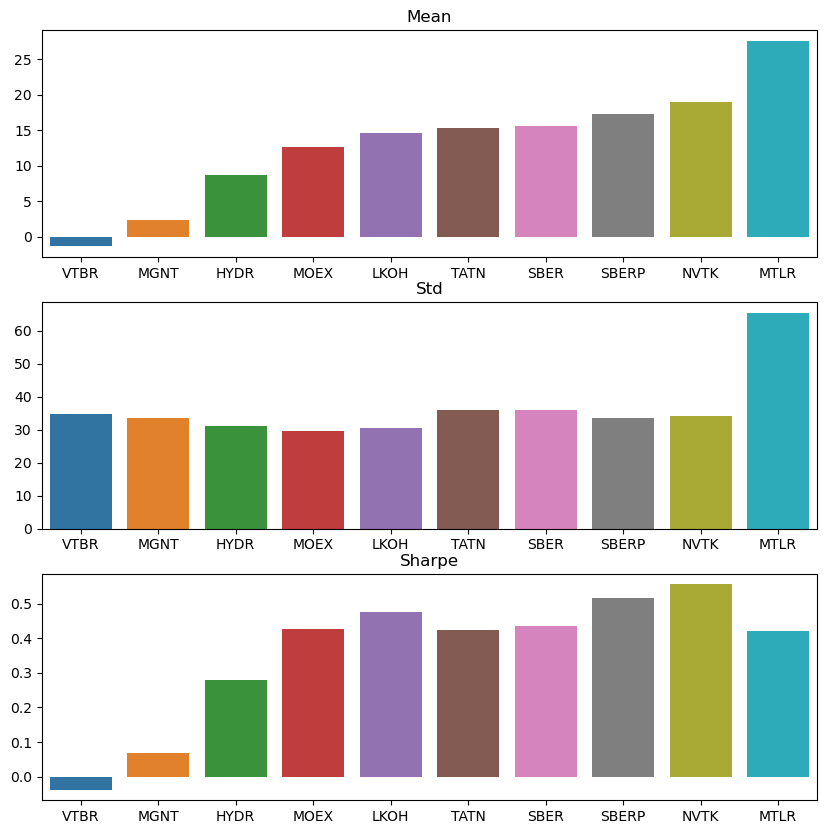

In [16]:
tickers = df_returns.columns
means = df_returns.mean() * N_TRADING_DAYS * 100
stds = df_returns.std() * np.sqrt(N_TRADING_DAYS) * 100
sharpe = means / stds
sorted_ind = np.argsort(means)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

ax1.set_title('Mean')
sns.barplot(x=tickers[sorted_ind], y=means[sorted_ind], ax=ax1)

ax2.set_title('Std')
sns.barplot(x=tickers[sorted_ind], y=stds[sorted_ind], ax=ax2)

ax3.set_title('Sharpe')
sns.barplot(x=tickers[sorted_ind], y=sharpe[sorted_ind], ax=ax3)

plt.show()

In [22]:
def print_statistics(w: pd.Series, df_returns: pd.DataFrame):
    assert np.all(w.index == df_returns.columns)
    assert np.isclose(w.sum(), 1), w.sum()
    returns = df_returns @ w
    mean = returns.mean() * N_TRADING_DAYS * 100
    std = returns.std() * np.sqrt(N_TRADING_DAYS) * 100
    sharpe = mean / std
    print(f'Return: {mean:.1f}% ± {std:.1f}%')
    print(f'Sharpe: {sharpe:.2f}')


print_statistics(pd.Series(np.full(len(df_returns.columns), 1 / len(df_returns.columns)), index=df_returns.columns), df_returns)

Return: 13.2% ± 25.1%
Sharpe: 0.52
